##### Last edited on June 17 by Claire Valva

## Notebook to Average and Display data from 40.5N-winter-processing (fft transform)

In [2]:
#import packages, for now everything I think I'll need
import numpy as np
from netCDF4 import Dataset, num2date # This is to read .nc files and time array
from scipy.signal import get_window, csd
from scipy.fftpack import fft, ifft, fftshift, fftfreq
import matplotlib.pyplot as plt
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
import pandas as pd
import datetime
from math import pi
import csv

### read in the csvs
##### to do: change to netcdf files?

In [3]:
#read in the csv with pandas
zonal_fft = pd.read_csv('zonal_winter.csv')
time_fft = pd.read_csv('time_fft_winter.csv')

In [4]:
#create time array
time_list = []
for i in range(0,55520):
    time_list.append(i*6)
tunit = "hours since 1979-01-01T00:00:00Z"
tarray = num2date(time_list,units = tunit,calendar = 'gregorian')

In [5]:
year_number = 2016 - 1979 #number of years observed
N = 240 #longitude markers
window_length = 300 #window length of the fft by time

In [6]:
#find number of spectra for each, so can plot
col_totnum = len(zonal_fft.columns)
spec_colnum = col_totnum - 3

columns_tolook = []
for i in range(spec_colnum-1):
    columns_tolook.append('spec_' + str(i))

In [7]:
#do the same for the time transform
time_col_totnum = len(time_fft.columns)
time_spec_colnum = col_totnum - 3

time_columns_tolook = []
for i in range(time_spec_colnum):
    time_columns_tolook.append('spec_' + str(i))

In [8]:
time_fft[time_columns_tolook] = time_fft[time_columns_tolook].astype(np.complex64)

### plot a single occurence from each csv to check reasonability
##### to do: investigate the connecting line

In [9]:
#take rows of dataframe and convert to complex values
zonalfft = zonal_fft[columns_tolook].iloc[2].values
zonalfreq = zonal_fft[columns_tolook].iloc[0].values

zonalfft = [complex(v) for v in zonalfft]
zonalfreq = [complex(v) for v in zonalfreq]

/home/clairev/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


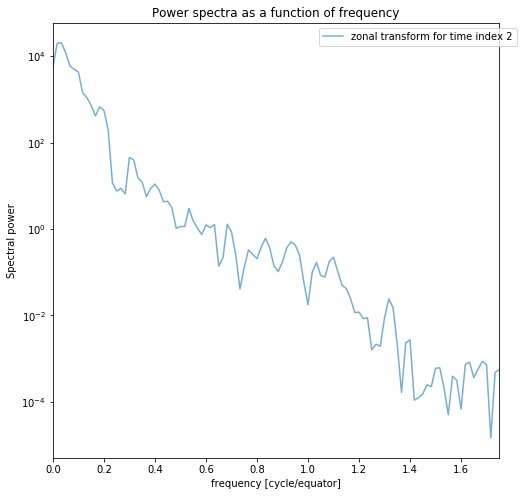

In [10]:
plt.clf();
plt.figure(figsize=(8,8))
plt.semilogy(zonalfreq, 
             np.abs(zonalfft), label='zonal transform for time index 2', alpha = 0.6)
plt.legend(bbox_to_anchor=(1.05,1.0))
plt.title('Power spectra as a function of frequency')
plt.xlabel('frequency [cycle/equator]');
plt.ylabel('Spectral power')
plt.xlim((0,1.75))
plt.show()

In [11]:
#take rows of dataframe and convert to complex values
timefft = time_fft[columns_tolook].iloc[2].values
timefreq = time_fft[columns_tolook].iloc[0].values

timefft = [complex(v) for v in timefft]
timefreq = [complex(v) for v in timefreq]

/home/clairev/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


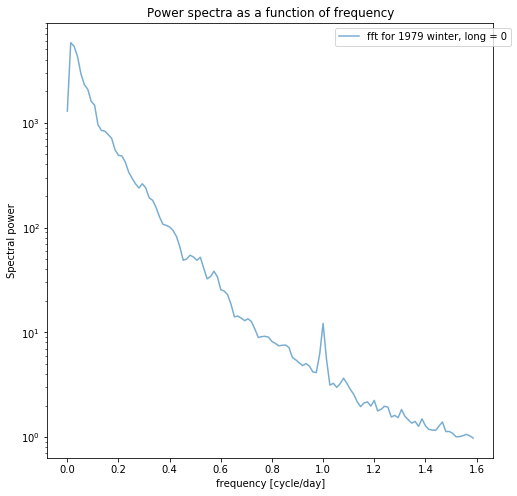

In [12]:
plt.clf();
plt.figure(figsize=(8,8))
plt.semilogy(timefreq, 
             np.abs(timefft), label='fft for 1979 winter, long = 0', alpha = 0.6)
plt.legend(bbox_to_anchor=(1.05,1.0))
plt.title('Power spectra as a function of frequency')
plt.xlabel('frequency [cycle/day]');
plt.ylabel('Spectral power')
plt.xlim()
plt.show()

### take the average spectra for each

In [13]:
#zonal
#count the number of rows in each
rows_time = len(time_fft.index)
rows_zonal = len(zonal_fft.index)

#transpose each row to its complex values
zonal_transpose = []

for i in range(1, rows_zonal):
    zonalfft = zonal_fft[columns_tolook].iloc[i].values
    zonalfft = [complex(v) for v in zonalfft]
    zonal_transpose.append(zonalfft)

In [14]:
#time
#transpose each row to its complex values
time_transpose = []

for i in range(1, rows_time):
    timefft = time_fft[time_columns_tolook].iloc[i].values
    timefft = [complex(v) for v in timefft]
    time_transpose.append(zonalfft)

In [15]:
#take the average of each row
zonal_average = np.average(zonal_transpose, axis=0)
time_average = np.average(time_transpose, axis=0)


#make dataframe and name columns for the spectra
averages_df = pd.DataFrame()
averages_df = averages_df.append(pd.Series(timefreq), ignore_index = True)
averages_df = averages_df.append(pd.Series(time_average), ignore_index = True)
averages_df = averages_df.append(pd.Series(zonal_average), ignore_index = True)
averages_df = averages_df.append(pd.Series(zonalfreq), ignore_index = True)
averages_df = averages_df.rename(columns = lambda x : 'spec_' + str(x))

#make labeling
#make the dataframe for index and dates
types_list = ['freq', 'avg', 'avg', 'freq']
trans_list = ['time', 'time', 'zonal', 'zonal']
labels = {'type' : types_list, 'transform' : trans_list}
new_header = pd.DataFrame(labels, columns = ['type', 'transform'])

# join the new_header dataframe back to the original dataframe
full_zonal_dataset = pd.concat([new_header, averages_df], axis=1)
full_zonal_dataset.to_csv('averages_winter.csv')

/home/clairev/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


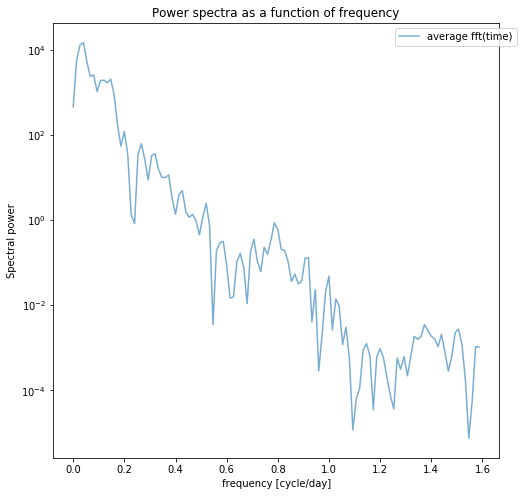

In [16]:
#plot the time average
plt.clf();
plt.figure(figsize=(8,8))
plt.semilogy(timefreq, 
             np.abs(time_average), label='average fft(time)', alpha = 0.6)
plt.legend(bbox_to_anchor=(1.05,1.0))
plt.title('Power spectra as a function of frequency')
plt.xlabel('frequency [cycle/day]');
plt.ylabel('Spectral power')
plt.xlim()
plt.show()

/home/clairev/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


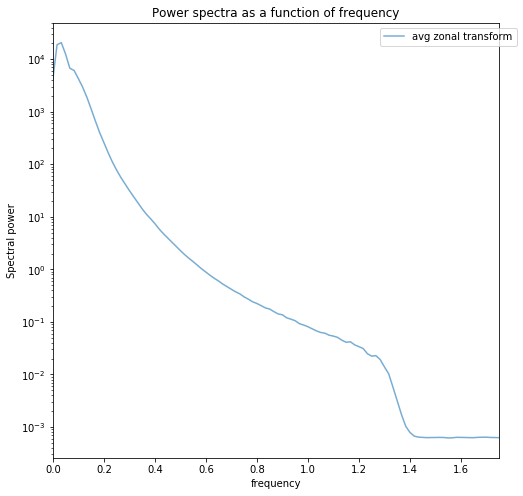

In [47]:
plt.clf();
plt.figure(figsize=(8,8))
plt.semilogy(zonalfreq, 
             np.abs(zonal_average), label='avg zonal transform', alpha = 0.6)
plt.legend(bbox_to_anchor=(1.05,1.0))
plt.title('Power spectra as a function of frequency')
plt.xlabel('frequency');
plt.ylabel('Spectral power')
plt.xlim((0,1.75))
plt.show()

plt.savefig('avg_power_spec.png')

/home/clairev/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


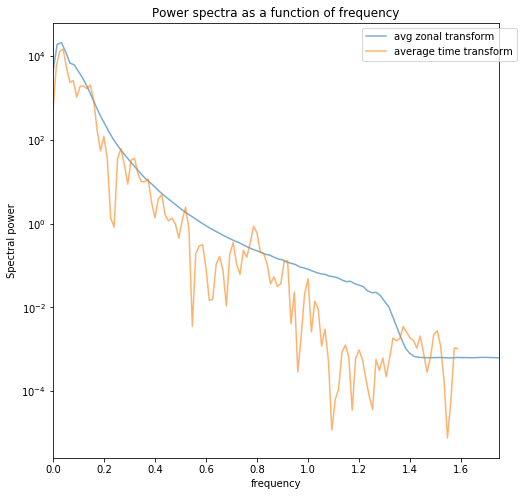

In [48]:
plt.clf();
plt.figure(figsize=(8,8))
plt.semilogy(zonalfreq, 
             np.abs(zonal_average), label='avg zonal transform', alpha = 0.6)
plt.semilogy(timefreq, 
             np.abs(time_average), label='average time transform', alpha = 0.6)
plt.legend(bbox_to_anchor=(1.05,1.0))
plt.title('Power spectra as a function of frequency')
plt.xlabel('frequency');
plt.ylabel('Spectral power')
plt.xlim((0,1.75))
plt.show()

plt.savefig('avg_power_spec.png')